In [150]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [151]:
path="D:\Science\OneDrive\Codes\CMUNew\cmu_new2.xlsx"
xl = pd.ExcelFile(path,sep='\s*,\s*',encoding='ascii')
df = xl.parse('sheet1')


In [98]:
df=df[2:236]
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 5']

In [99]:
CMUEvents=[]

for i in range(0,234):
    data=df.iloc[i]
    source=data['Unnamed: 6']
    ParticipantB=data['Unnamed: 1']
    ParticipantA=data['Unnamed: 0']
    Buniqueid=data['Unnamed: 4']
    
    if type(ParticipantA)==str:
        x=ParticipantA.split(',')
        if len(x)==0:
            CMUEvents.append([x,ParticipantB,Buniqueid,source])
        if len(x)>0:
            for i in x:
                CMUEvents.append([i,ParticipantB,Buniqueid,source])
    
    
    if type(ParticipantA)==float:
        CMUEvents.append(['?',ParticipantB,Buniqueid,source])
        
        #if len(ParticipantA)==1:
            #CMUEvents.append()
        
    
    
    

In [106]:
#df=pd.DataFrame(CMUEvents)
#df.to_csv('cmu_new3.csv')

In [105]:
###########

In [152]:
path="D:\Science\OneDrive\Codes\CMUNew\cmu_new4.xlsx"
xl = pd.ExcelFile(path,sep='\s*,\s*',encoding='ascii')
CMUEvents_new = xl.parse('sheet1')

In [153]:
CMUEvents_new

,Participant A text,Participant B text,Participant A,Participant B,3
0,PKCApn,ADAM17,uniprot:P17252,uniprot:P78536,PMID24096196
1,PDPK1pf,AKT1,uniprot:O55173,uniprot:P31749,PMC3128635
2,ICMTpn,AKT1,uniprot:O60725,uniprot:P31749,PMC3128635
3,LKB1pn,AMPK,uniprot:Q15831,uniprot:Q13131,PMC3454471
4,FOSpn,AP1,uniprot:P01100,uniprot:P05412,PMC3454471
5,JNK1pn,AP1,uniprot:P45983,uniprot:P05412,PMC3454471
6,REF1,AP1,uniprot:P27695,uniprot:P05412,PMC3454471
7,NRF2pn,ARE,uniprot:Q16236,uniprot:ARE,PMC3454471
8,BACH1pn,ARE,uniprot:O14867,uniprot:ARE,PMC3454471
9,THIOREDOXINpn,ASK,chemidplus:D017382000,uniprot:Q99683,PMC3454471


In [113]:
##

In [154]:
First1037Papers=pd.read_csv('D:\Science\OneDrive\Codes\kb\First1037Papers.csv')
First1037PapersP=First1037Papers[First1037Papers['Sign']=='Positive']   #select only positive events

In [155]:
LEN=[]
for i in range(0,371):
    x=CMUEvents_new['Participant A'].iloc[i]
    y=CMUEvents_new['Participant B'].iloc[i]
    a= First1037PapersP[ (First1037PapersP['Participant A']==x) & (First1037PapersP['Participant B']==y)]
    LEN.append(len(a))

32.686980609418285

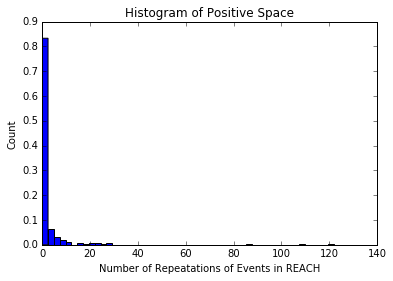

In [156]:
weights = np.ones_like(LEN)/len(LEN)
n, bins, patches=plt.hist(LEN,bins=50,weights=weights)

plt.xlabel('Number of Repeatations of Events in REACH')
plt.ylabel('Count')
plt.title(r'Histogram of Positive Space')


LEN=np.array(LEN)
100*len(LEN[LEN!=0])/361

## NEgative Space


In [157]:
a=list(CMUEvents_new['Participant A'])
b=list(CMUEvents_new['Participant B'])
Participants=list(set(a+b))

Participants.remove('?')

In [160]:
T=len(Participants)
Count=[]

for i in range(0,T):
    for j in range(0,T):
        a=df[ (CMUEvents_new['Participant A']==Participants[i]) & (CMUEvents_new['Participant B']==Participants[j])]
        
        if len(a) == 0:
            b=First1037PapersP[ (First1037PapersP['Participant A']==Participants[i]) & (First1037PapersP['Participant B']==Participants[j])]
        Count.append(len(b))

3.803742481621742

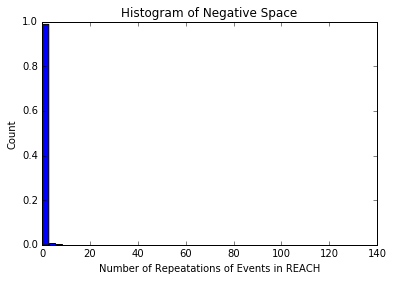

In [166]:
weights = np.ones_like(Count)/len(Count)
n, bins, patches=plt.hist(Count,bins=50,weights=weights)

plt.xlabel('Number of Repeatations of Events in REACH')
plt.ylabel('Count')
plt.title(r'Histogram of Negative Space')


Count=np.array(Count)
100*len(Count[Count!=0])/(T*T)

In [169]:
### CMUEvents_new

## Search Only in papers mentioned by CMU:

In [277]:

Papers=[]
for i in CMUEvents_new[3]:
    if type(i)!=float:
        k=i.split(',')
        for j in k:
            if j.startswith( 'PMC' ):
                j=j.replace('PMC','')
                Papers.append(j)
PMClist=list(set(Papers))

In [266]:

#df=pd.DataFrame(columns=First1037PapersP.columns)
df=pd.DataFrame()
#df.columns=First1037PapersP.columns

for i in PMClist:
    a=First1037PapersP[First1037PapersP['PMC Id']==int(i)]
    df=df.append(a)

# these are the papers that we didn't find any event in them

In [295]:
a=[str(x) for x in list(set(df['PMC Id'])) if str(x) in PMClist]
set(PMClist)-set(a)

{'2882124',
 '3048826',
 '3128635',
 '3193400',
 '3454471',
 '370062',
 '4355017',
 '4806205'}

In [296]:
LEN=[]
for i in range(0,371):
    x=CMUEvents_new['Participant A'].iloc[i]
    y=CMUEvents_new['Participant B'].iloc[i]
    a= df[ (df['Participant A']==x) & (df['Participant B']==y)]
    LEN.append(len(a))

In [300]:
LEN=np.array(LEN)
len(LEN[LEN!=0])              # 7 out of 371 events have matches

7